# Image Text Matching

Model: CLIP from OpenAI (605MB)

In [17]:
from PIL import Image
import matplotlib.pyplot as plt
import requests
import torch
import seaborn as sns
import pandas as pd

from transformers import CLIPProcessor, CLIPModel

model = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")

path = "./images/flamingo.jpg"
image = Image.open(path)

possible_descriptions = [
    "a cat",
    "a dog",
    "a bear",
    "many flamingos",
    "a meercat",
]

inputs = processor(
    text=possible_descriptions,
    images=image,
    return_tensors="pt",
    padding=True
)

outputs = model(**inputs)
logits_per_image = outputs.logits_per_image  # this is the image-text similarity score
probs = logits_per_image.softmax(dim=1)  # we can take the softmax to get the label probabilities

In [ ]:
topv, topi = torch.topk(logits_per_image, 1)
best_description = possible_descriptions[topi]

plt.imshow(image)

print("Description matching this picture: " + best_description)

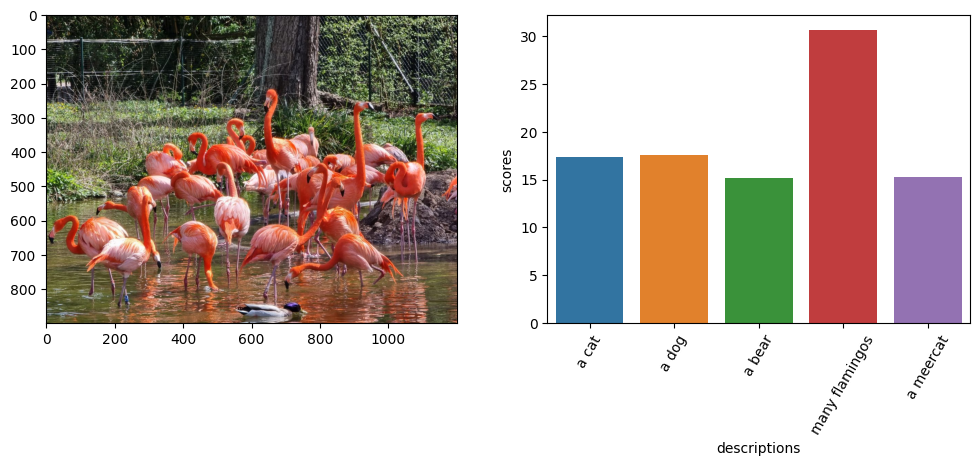

In [18]:
df = pd.DataFrame({
    "descriptions": possible_descriptions,
    "scores": logits_per_image.squeeze().detach().cpu().numpy()
})

fig, ax = plt.subplots(1, 2, figsize=(12,4))

ax[0].imshow(image)
ax[1] = sns.barplot(data=df, x="descriptions", y="scores")
ax[1].set_xticklabels(possible_descriptions, rotation=60)
plt.show()

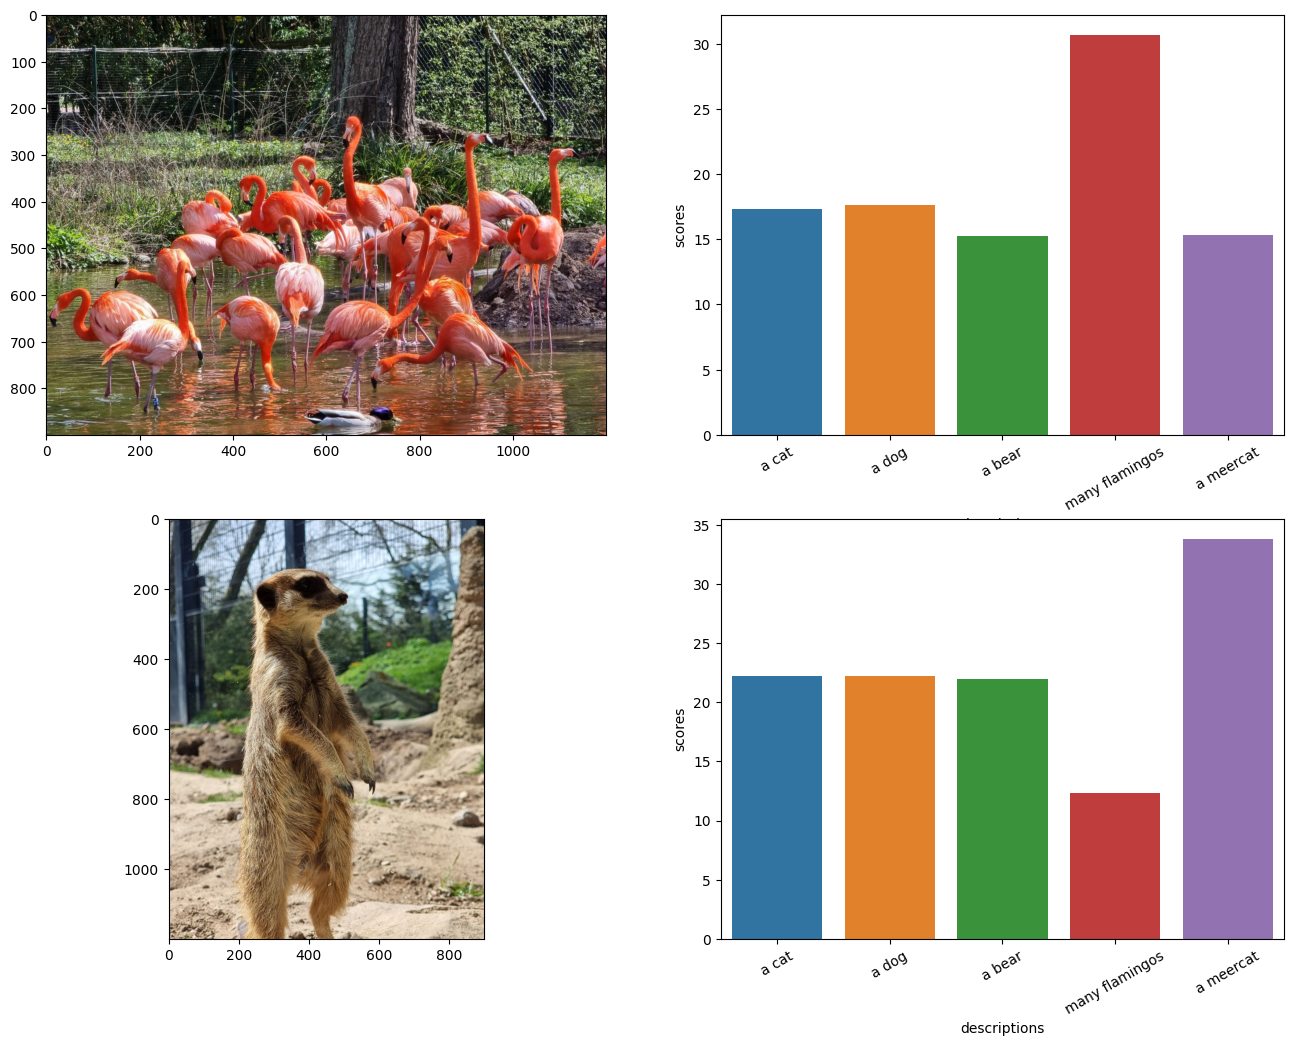

In [38]:
possible_descriptions = [
    "a cat",
    "a dog",
    "a bear",
    "many flamingos",
    "a meercat",
]

image1 = Image.open("./images/flamingo.jpg")
inputs1 = processor(
    text=possible_descriptions,
    images=image1,
    return_tensors="pt",
    padding=True
)

image2 = Image.open("./images/meercat.jpg")
inputs2 = processor(
    text=possible_descriptions,
    images=image2,
    return_tensors="pt",
    padding=True
)

outputs1 = model(**inputs1)
logits_per_image1 = outputs1.logits_per_image  # this is the image-text similarity score
probs1 = logits_per_image1.softmax(dim=1)  # we can take the softmax to get the label probabilities

outputs2 = model(**inputs2)
logits_per_image2 = outputs2.logits_per_image  # this is the image-text similarity score
probs2 = logits_per_image2.softmax(dim=1)  # we can take the softmax to get the label probabilities

df1 = pd.DataFrame({
    "descriptions": possible_descriptions,
    "scores": logits_per_image1.squeeze().detach().cpu().numpy()
})
df2 = pd.DataFrame({
    "descriptions": possible_descriptions,
    "scores": logits_per_image2.squeeze().detach().cpu().numpy()
})

fig, ax = plt.subplots(2, 2, figsize=(16,12))

ax[0, 0].imshow(image1)
sns.barplot(data=df1, x="descriptions", y="scores", ax=ax[0, 1])
ax[0, 1].set_xticklabels(possible_descriptions, rotation=30)

ax[1, 0].imshow(image2)
sns.barplot(data=df2, x="descriptions", y="scores", ax=ax[1, 1])
ax[1, 1].set_xticklabels(possible_descriptions, rotation=30)
plt.show()